# Task -Project MalJPEG

## Imports

In [1]:
# Imports
import numpy as np # Support for large arrays and matrices, along with high-level mathematical functions.
import seaborn as sns # Graphing/Plotting module.
import pandas as pd # CSV handling with operations on tabular data.
import lightgbm as lgb

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer, StandardScaler

## Read Data and Preprocess it to fit into DeepMAL model

In [2]:
# Read Data
dataset_type = 'markers_image.csv' # other options: 'markers_image.csv' or 'metadata.csv'

filepath = f'./datasets/{dataset_type}'
df = pd.read_csv(filepath)

## Preprocess the data

In [3]:
label_type = 'label' # options: 'label'

X = np.stack([
    df['Marker_EOI_content_after_num'], df['File_markers_num'], df['File_size'],
    df['Marker_APP1_size_max'], df['Marker_APP12_size_max'], df['Marker_COM_size_max'], 
    df['Marker_DHT_num'], df['Marker_DHT_size_max'], df['Marker_DQT_num'], 
    df['Marker_DQT_size_max']
]).T

y = np.stack(df[label_type])

scaler_mix = StandardScaler()
scaler_mix.fit(X)
X = scaler_mix.transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1666, stratify=y)

## Train/Fit

In [5]:
# LGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=500, n_jobs=4, random_state=2021,
                             boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                             importance_type='split', learning_rate=0.1, max_depth=-1,
                             min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                             num_leaves=31, objective=None, reg_alpha=0.0, reg_lambda=0.0,
                             subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_clf.fit(X_train, y_train)

LGBMClassifier(n_estimators=500, n_jobs=4, random_state=2021)

In [6]:
# Decision Tree classifier
dtc_clf = DecisionTreeClassifier(max_depth=30, random_state=1914)
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1914)

In [7]:
# Random Forest classifier
rfc_clf = RandomForestClassifier(n_estimators=500, max_depth=30, n_jobs=4, random_state=2021)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, n_jobs=4,
                       random_state=2021)

In [8]:
# XGB classifier
xgb_clf = XGBClassifier(n_estimators=500, max_depth=30, n_jobs=4, eval_metric='mlogloss', 
                        random_state=1941, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=30, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1941,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## Test/Predict

In [9]:
lgb_predictions = lgb_clf.predict(X_test)
dtc_predictions = dtc_clf.predict(X_test)
rfc_predictions = rfc_clf.predict(X_test)
xgb_predictions = xgb_clf.predict(X_test)
    
true_labels = y_test

accuracy score: 99.26%
TPR: 0.949%
FPR: 0.003%
AUC&ROC 0.963300112962148
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8209
           1       0.95      0.93      0.94       542

    accuracy                           0.99      8751
   macro avg       0.97      0.96      0.97      8751
weighted avg       0.99      0.99      0.99      8751



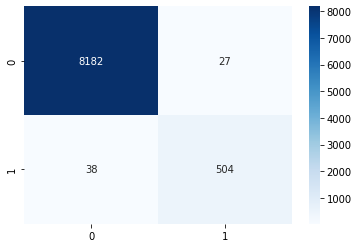

In [10]:
cf_matrix = confusion_matrix(true_labels, lgb_predictions)

accuracy = accuracy_score(true_labels, lgb_predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
print("TPR: {0:.3f}%".format(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1])))
print("FPR: {0:.3f}%".format(cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[1][0])))
print("AUC&ROC", roc_auc_score(true_labels, lgb_predictions))
print(classification_report(true_labels, lgb_predictions))

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))

accuracy score: 99.13%
TPR: 0.922%
FPR: 0.005%
AUC&ROC 0.9669381189487373
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8209
           1       0.92      0.94      0.93       542

    accuracy                           0.99      8751
   macro avg       0.96      0.97      0.96      8751
weighted avg       0.99      0.99      0.99      8751



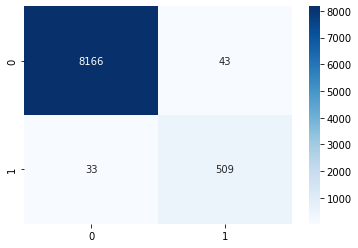

In [11]:
cf_matrix = confusion_matrix(true_labels, dtc_predictions)

accuracy = accuracy_score(true_labels, dtc_predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
print("TPR: {0:.3f}%".format(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1])))
print("FPR: {0:.3f}%".format(cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[1][0])))
print("AUC&ROC", roc_auc_score(true_labels, dtc_predictions))
print(classification_report(true_labels, dtc_predictions))

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))

accuracy score: 99.38%
TPR: 0.969%
FPR: 0.002%
AUC&ROC 0.9639701093076224
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8209
           1       0.97      0.93      0.95       542

    accuracy                           0.99      8751
   macro avg       0.98      0.96      0.97      8751
weighted avg       0.99      0.99      0.99      8751



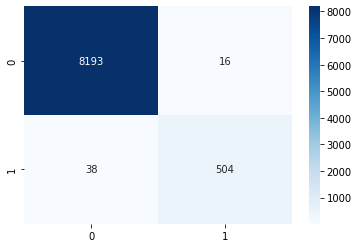

In [12]:
cf_matrix = confusion_matrix(true_labels, rfc_predictions)

accuracy = accuracy_score(true_labels, rfc_predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
print("TPR: {0:.3f}%".format(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1])))
print("FPR: {0:.3f}%".format(cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[1][0])))
print("AUC&ROC", roc_auc_score(true_labels, rfc_predictions))
print(classification_report(true_labels, rfc_predictions))

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))

accuracy score: 99.30%
TPR: 0.960%
FPR: 0.003%
AUC&ROC 0.9618205470640405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8209
           1       0.96      0.93      0.94       542

    accuracy                           0.99      8751
   macro avg       0.98      0.96      0.97      8751
weighted avg       0.99      0.99      0.99      8751



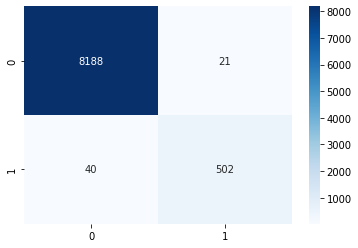

In [13]:
cf_matrix = confusion_matrix(true_labels, xgb_predictions)

accuracy = accuracy_score(true_labels, xgb_predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
print("TPR: {0:.3f}%".format(cf_matrix[1][1]/(cf_matrix[0][1]+cf_matrix[1][1])))
print("FPR: {0:.3f}%".format(cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[1][0])))
print("AUC&ROC", roc_auc_score(true_labels, xgb_predictions))
print(classification_report(true_labels, xgb_predictions))

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))

In [14]:
print(lgb_clf.feature_importances_)

[ 597 3044 3982 4997  105  246  213 1701   57   58]


In [15]:
print(dtc_clf.feature_importances_)

[0.64623686 0.02076897 0.0341452  0.21866504 0.0007156  0.00077505
 0.00577724 0.07092242 0.00132516 0.00066845]


In [16]:
print(rfc_clf.feature_importances_)

[0.52193334 0.06267819 0.10751634 0.13711565 0.00924703 0.01711668
 0.02996262 0.0671051  0.02379629 0.02352875]


In [17]:
print(xgb_clf.feature_importances_)

[0.8606652  0.00681743 0.0038633  0.02452504 0.00676591 0.03024476
 0.02275542 0.03322048 0.00527386 0.00586861]
